# Diagrams 

## Introducción

Nació para crear prototipos de una nueva arquitectura de sistema sin herramientas de diseño. También puede describir o visualizar la arquitectura del sistema existente.

`Diagram as Code` le permite rastrear los cambios del diagrama de arquitectura en cualquier sistema de control de versiones.

Actualmente, Diagrams admite seis proveedores principales: `AWS`, `Azure`, `GCP`, `Kubernetes`, `Alibaba Cloud` y `Oracle Cloud`. Ahora también admite nodos `On-Premise`, así como `Lenguajes de Programación` y `Frameworks`.


## Instalación

* Python 3.6 o superior

* Instalar  `Graphviz` 

* Instalar la librería `diagrams`:

```terminal
# using pip (pip3)
$ pip install diagrams

# using pipenv
$ pipenv install diagrams

# using poetry
$ poetry add diagrams
```

## Tipos de componentes
La biblioteca de diagramas proporciona componentes para varios proveedores diferentes. Lo siguiente probablemente será más relevante para la mayoría de los casos de uso de los 14 disponibles.

### AWS/GCP/Azure

Estos proveedores exponen los activos oficiales del servicio en la nube que usaría para cualquier diagrama que aproveche uno de los principales proveedores de la nube. 

### Generic and On-Premise
Estos nodos probablemente se usarán juntos en el caso de que desee ilustrar las tecnologías subyacentes de una manera independiente de la nube. Por ejemplo, proporcionar una arquitectura con un componente Beam sobre la pantalla Google DataFlow.

### Frameworks

Estos componentes serán útiles si desea ilustrar un nodo con un lenguaje de programación.

### SaaS
Existe  una colección de nodos SaaS que se pueden usar, lo que resulta útil cuando desea mostrar que su arquitectura tiene notificaciones que llegan a algo como Slack.

## Conceptos


### Diagrama

`Diagram` es el objeto principal que representa un diagrama.. El objeto `Diagram` representa un contexto de diagrama global.

Puede crear un contexto de diagrama con la clase `Diagram`. El primer parámetro del constructor `Diagram` se utilizará para el nombre del archivo de salida.

In [ ]:
%%writefile diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram"):
    EC2("web")

Y si ejecuta el script anterior con el siguiente comando,

```terminal
$ python diagram.py
```

Generará un archivo de imagen con un solo nodo `EC2` dibujado como `simple_diagram.png` en su directorio de trabajo, y abrirá ese archivo de imagen creado inmediatamente.

#### Jupyter notebooks

`Diagram`también se pueden renderizar directamente dentro del Jupyter de la siguiente manera:

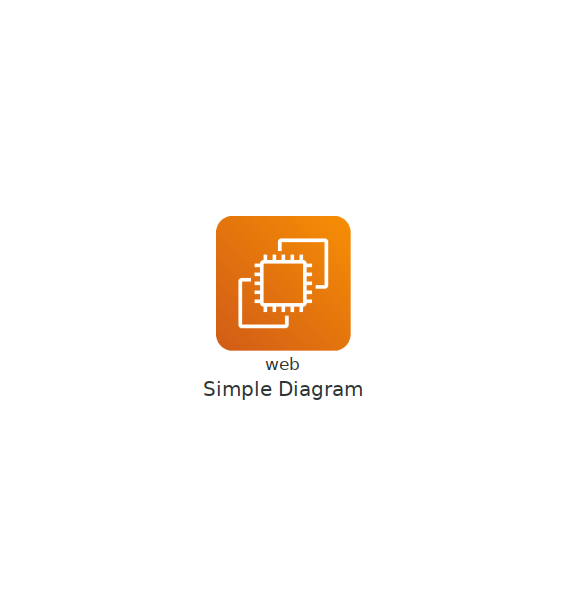

In [2]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False) as diagram:
    EC2("web")
diagram

#### Opciones
Puede especificar el formato del archivo de salida con el parámetro `outformat`. El valor predeterminado es `png`.

```
(png, jpg, svg, y pdf) son soportados.
```

In [3]:
%%writefile diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", outformat="jpg"):
    EC2("web")

Overwriting diagram.py


Puede especificar el nombre del archivo de salida con el parámetro de `filename`. La extensión no debe incluirse, está determinada por el parámetro `outformat`.

In [4]:
%%writefile diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", filename="my_diagram"):
    EC2("web")

Overwriting diagram.py


También puede deshabilitar la apertura automática de archivos configurando el parámetro `show` como `False`. El valor predeterminado es `True`.

In [5]:
%%writefile diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False):
    EC2("web")

Overwriting diagram.py


Permite opciones personalizadas de atributos de puntos de `Graphviz`.

```
`graph_attr`, `node_attr` y `edge_attr` son soportados.

```

In [6]:
%%writefile diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
    "fontsize": "45",
    "bgcolor": "transparent"
}

with Diagram("Simple Diagram", show=False, graph_attr=graph_attr):
    EC2("web")

Overwriting diagram.py


### Nodes

``Node`` es un segundo objeto que representa un nodo o componente del sistema. ``Node`` es un concepto abstracto que representa un único objeto componente del sistema.

Un objeto ``Node`` consta de tres partes: proveedor, tipo de recurso y nombre. Es posible que ya haya visto cada parte en el ejemplo anterior.

In [7]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False) as dj:
    EC2("web")

En el ejemplo anterior,`EC2` es un nodo de tipo de recurso informático proporcionado por el proveedor de `AWS`.

Puede usar otros objetos ``Node`` de manera similar como:

```python
# aws resources
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB, Route53, VPC
...

# azure resources
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
...

# alibaba cloud resources
from diagrams.alibabacloud.compute import ECS
from diagrams.alibabacloud.storage import ObjectTableStore
...

# gcp resources
from diagrams.gcp.compute import AppEngine, GKE
from diagrams.gcp.ml import AutoML 
...

# k8s resources
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass
...

# oracle resources
from diagrams.oci.compute import VirtualMachine, Container
from diagrams.oci.network import Firewall
from diagrams.oci.storage import Filestorage, Storagegateway
```

#### Data Flow
Puede representar el flujo de datos conectando los nodos con estos operadores: 

* `>>`: Conecta los nodos de izquierda a derecha.
* `<<`: Conecta los nodos de derecha a izquierda.
* `-`: Conecta nodos en ninguna dirección. No dirigido.

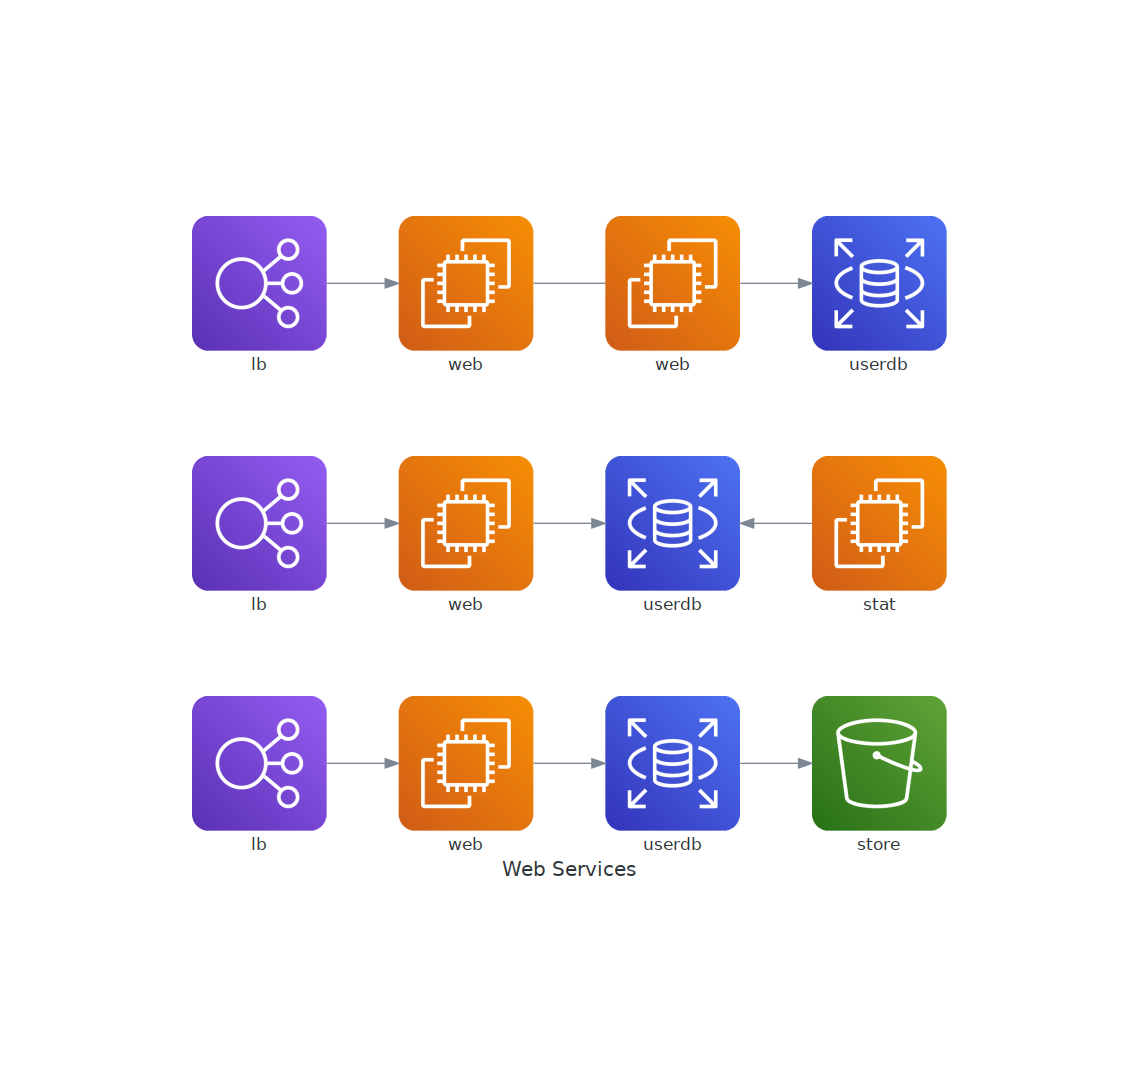

In [8]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3

with Diagram("Web Services", show=False) as node:
    ELB("lb") >> EC2("web") >> RDS("userdb") >> S3("store")
    ELB("lb") >> EC2("web") >> RDS("userdb") << EC2("stat")
    (ELB("lb") >> EC2("web")) - EC2("web") >> RDS("userdb")
node

```warning
Tenga cuidado al usar `-` y cualquier operador de turno juntos, lo que podría causar resultados inesperados debido a la precedencia del operador.
```

```
El orden de los diagramas renderizados es el inverso del orden de declaración.
```

Puede cambiar la dirección del flujo de datos con el parámetro `direction`. El valor predeterminado es **LR**.


```
(TB, BT, LR y RL) están permitidos.

```

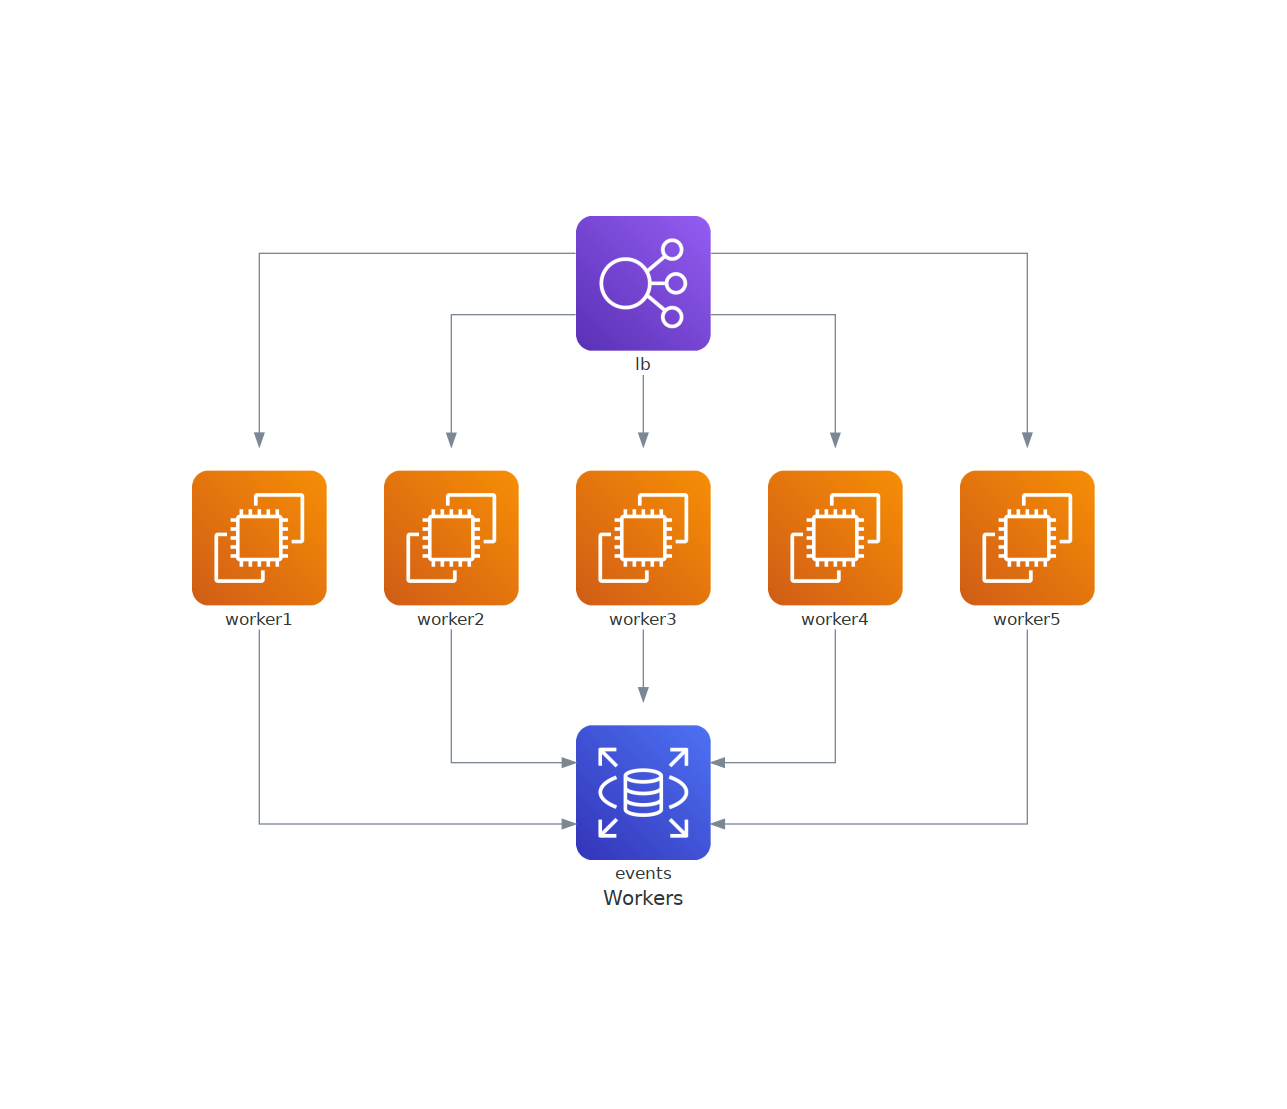

In [9]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Workers", show=False, direction="TB")as node:
    lb = ELB("lb")
    db = RDS("events")
    lb >> EC2("worker1") >> db
    lb >> EC2("worker2") >> db
    lb >> EC2("worker3") >> db
    lb >> EC2("worker4") >> db
    lb >> EC2("worker5") >> db
node

#### Group Data Flow
El ejemplo del `worker` anterior tiene demasiados flujos redundantes. En este caso, puede agrupar nodos en una lista para que todos los nodos estén conectados a otros nodos a la vez.

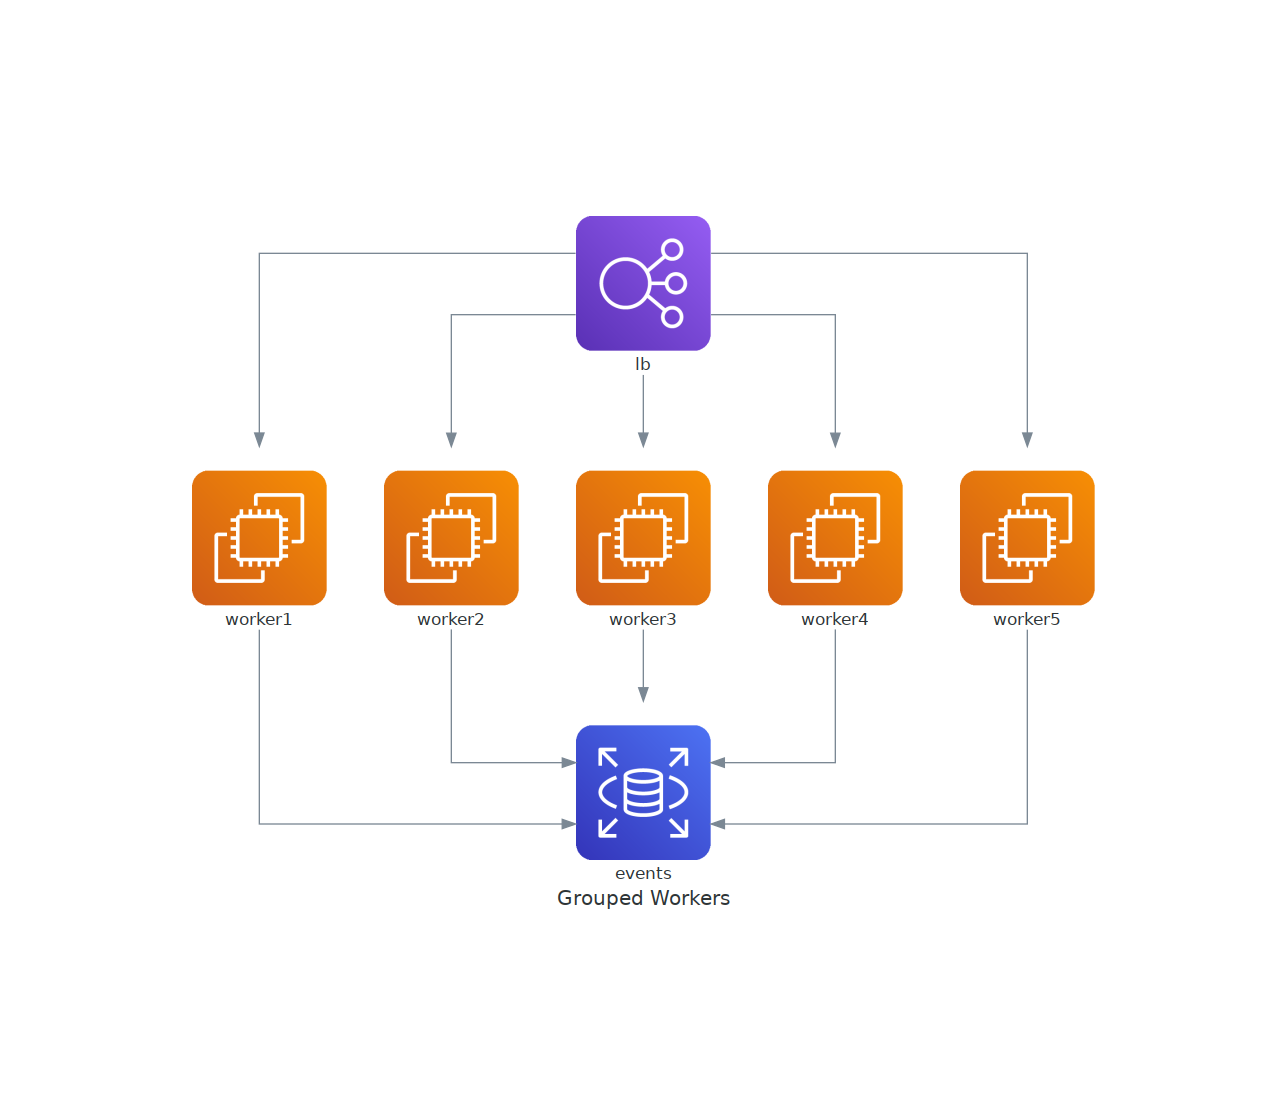

In [10]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB") as node:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

node

```warning
No puede conectar dos listas directamente porque las operaciones `shift/arithmetic` entre listas no están permitidas en Python.
```

### Clusters
`Cluster` le permite agrupar (o agrupar) los nodos en un grupo aislado. `Cluster` representa un contexto de clúster local.

Puede crear un contexto de clúster con la clase `Cluster`. Y también puede conectar los nodos de un clúster a otros nodos fuera de un clúster.

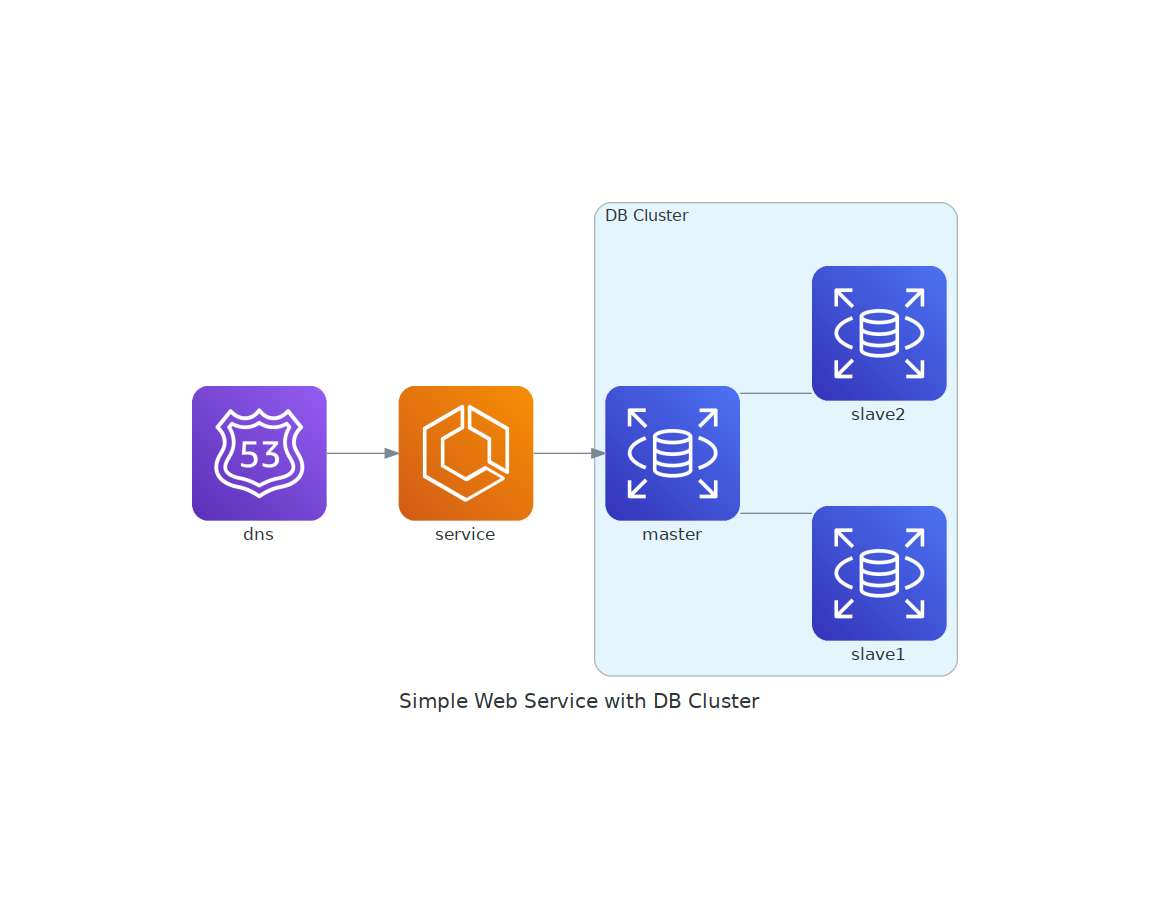

In [11]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import RDS
from diagrams.aws.network import Route53

with Diagram("Simple Web Service with DB Cluster", show=False) as cluster:
    dns = Route53("dns")
    web = ECS("service")

    with Cluster("DB Cluster"):
        db_master = RDS("master")
        db_master - [RDS("slave1"),
                     RDS("slave2")]

    dns >> web >> db_master
cluster

### Nested Clusters
También es posible la agrupación en clústeres anidados.

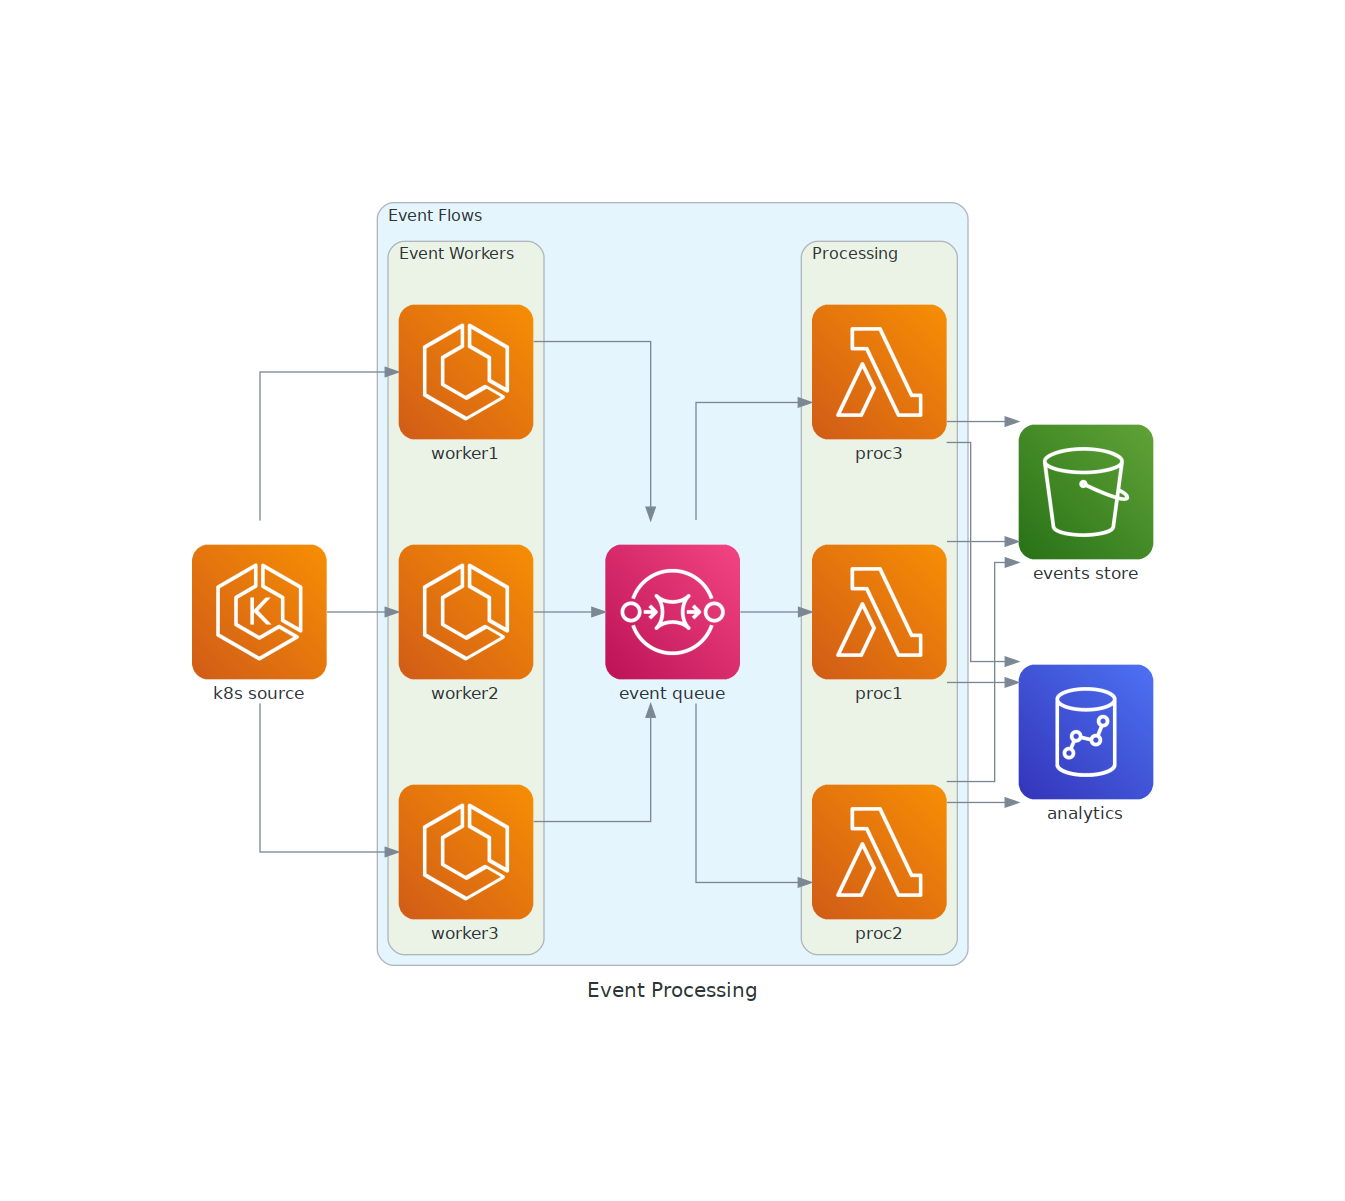

In [12]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as cluster:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
cluster

```
No hay límite de profundidad de anidación. Siéntase libre de crear clústeres anidados con la profundidad que desee.
```

### Edges
`Edge` representa un borde entre nodos. `Edge`  es un objeto que representa una conexión entre nodos con algunas propiedades adicionales.

Un objeto `Edge` contiene tres atributos: etiqueta, color y estilo que reflejan los atributos de borde de `graphviz` correspondientes.

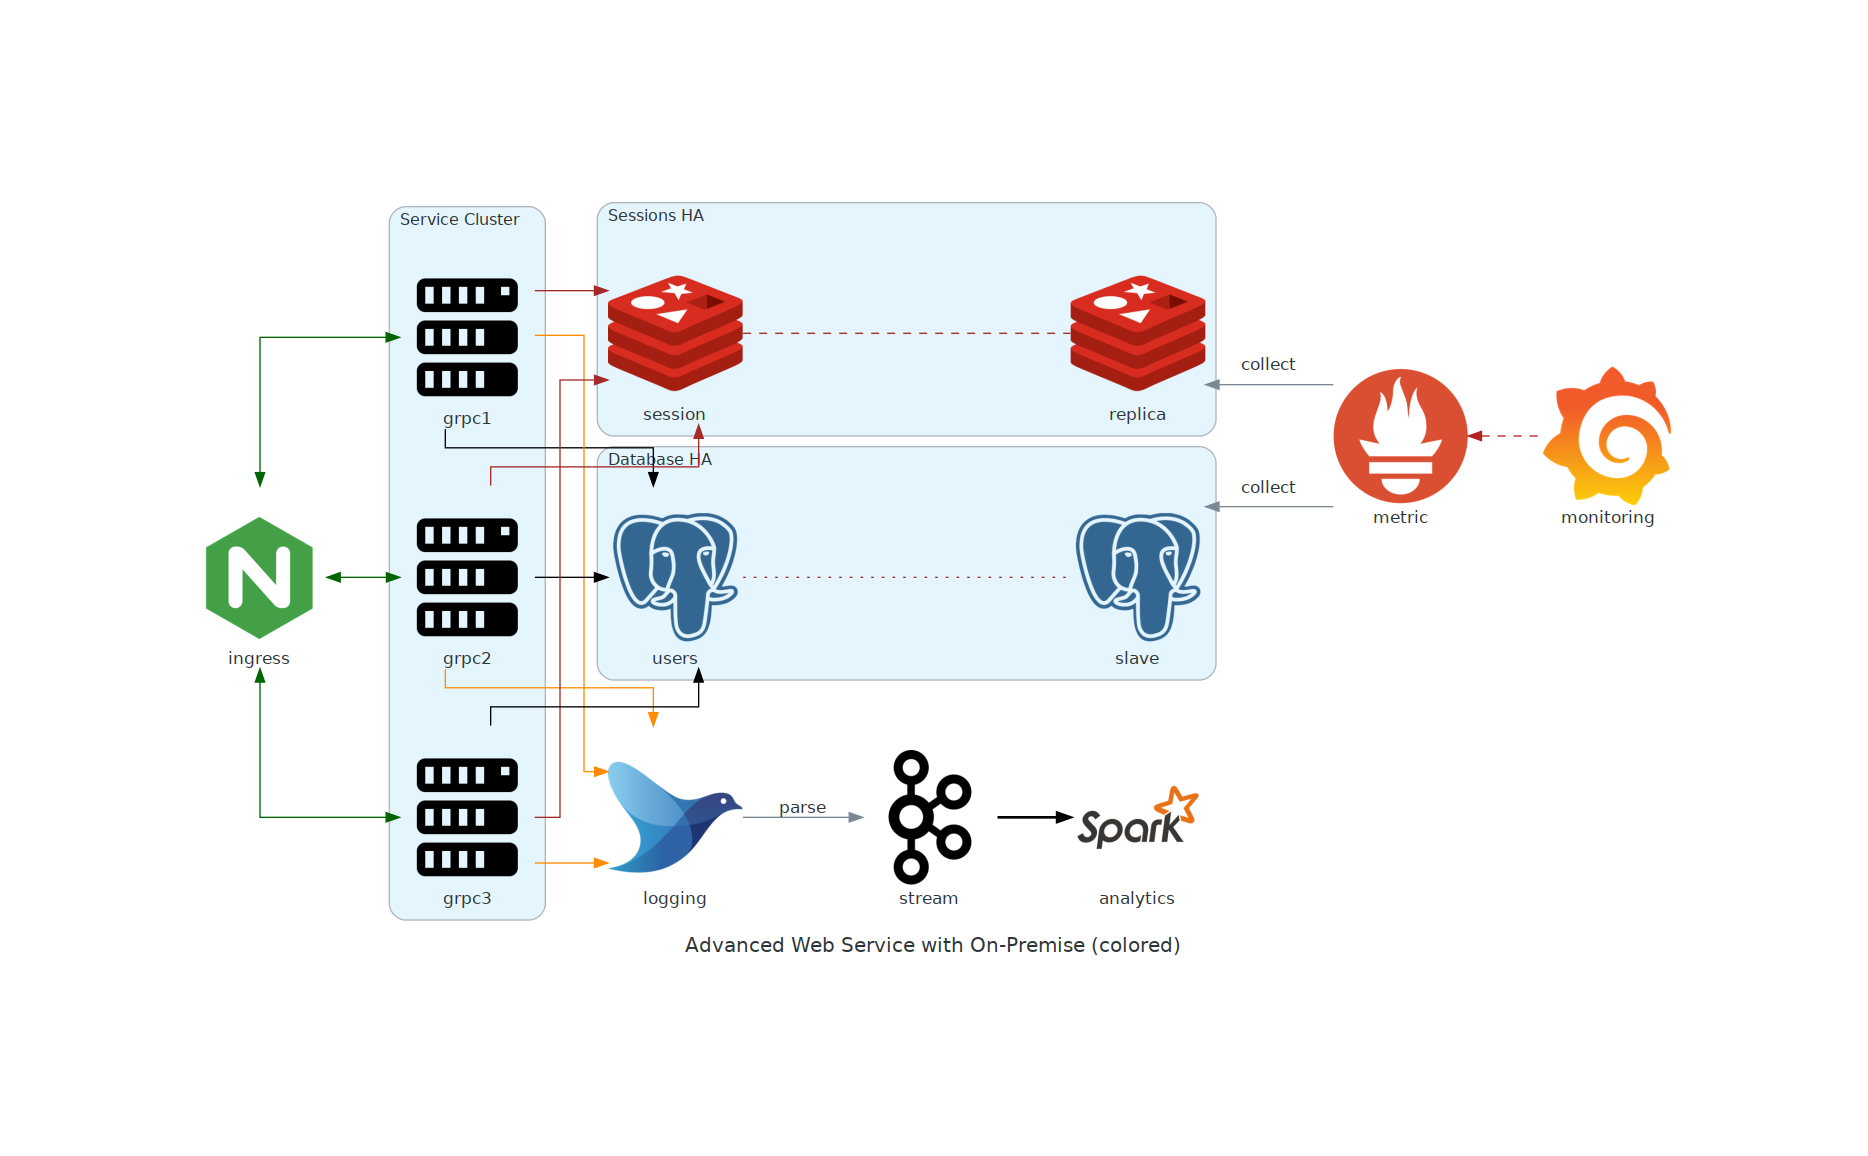

In [13]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.logging import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as edges:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        master = Redis("session")
        master - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> master

    with Cluster("Database HA"):
        master = PostgreSQL("users")
        master - Edge(color="brown", style="dotted") - PostgreSQL("slave") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> master

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator
edges

**Observación**: al final de cada presentación, se eliminan los archivos que generamos de manera temporal.

In [14]:
!rm -r *.png *.jpg diagram.py

rm: cannot remove '*.jpg': No such file or directory
